# Simulating A Pendulum using SciPy

In [48]:
import numpy as np
import scipy
from scipy.integrate import ode
import matplotlib.pyplot as plt
import matplotlib.animation as anim
%matplotlib notebook

# Defining constants
g = 9.81 # Force of gravity
L = 10 # Length of pendulum
b = 0.5 # Drag coefficient
m = 3 # Mass of spring

# Time boundaries
t0 = 0.0
tf = 20
dt = 0.1

# Run integrations for different initial conditions
# Initial conditions are passed as degrees
Th0s = np.radians([
    [10,   0],
    [30,   0],
    [90,   0],
    [ 0, 100],
    [ 0, 150]
])

## The Simplest Example: Single Pendulum with No Drag

Second order differential equation:

$$
\ddot{\theta} + \frac{g}{L} sin(\theta) = 0
$$

Expand it to a vectorized form (using $\omega = \dot{\theta}$ as angular velocity)

$$
\begin{bmatrix}
    \dot{\theta} \\
    \dot{\omega}
\end{bmatrix} = \begin{bmatrix}
    \omega \\
    -\frac{g}{L} sin(\theta)
\end{bmatrix}
$$

Phase plot

<IPython.core.display.Javascript object>


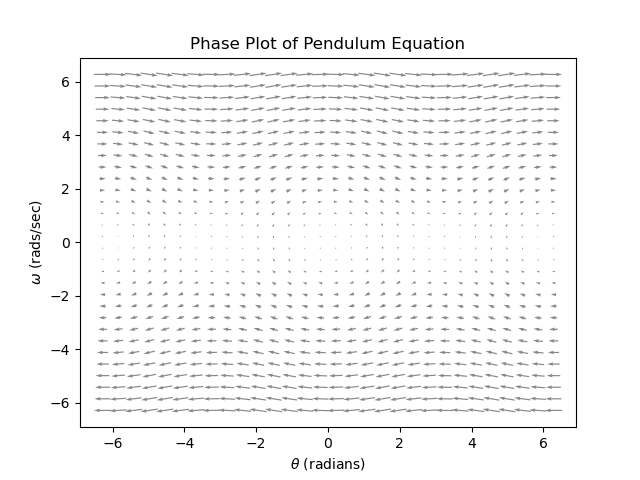

In [49]:
# Begin plot
plt.figure()

# Create phase plot
thv, omv = np.meshgrid(
    np.linspace(-2*np.pi, 2*np.pi, 30),
    np.linspace(-2*np.pi, 2*np.pi, 30))
thd = omv
omd = -(g/L)*np.sin(thv)
plt.quiver(thv, omv, thd, omd, color='#888', pivot='mid')

# Display Plot
plt.xlabel('$\\theta$ (radians)')
plt.ylabel('$\omega$ (rads/sec)')
plt.title('Phase Plot of Pendulum Equation')
plt.show()

Simulate using ode

<IPython.core.display.Javascript object>


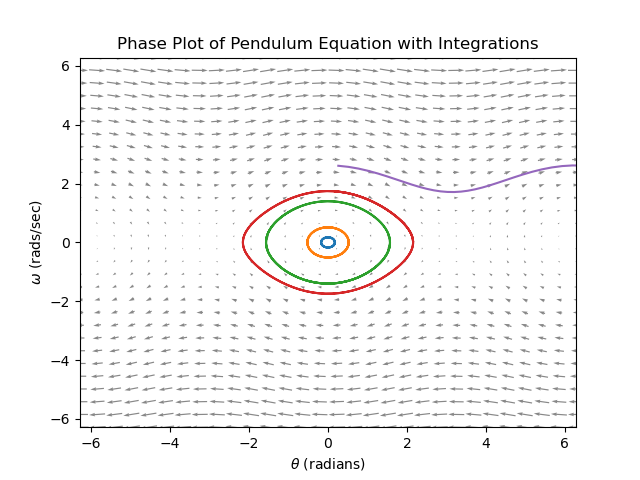

In [50]:
# Integration function
f = lambda t, Th: [Th[1], -(g/L)*np.sin(Th[0])]

# Plot all of this garbage
plt.figure()

# Create phase plot
thv, omv = np.meshgrid(
    np.linspace(-2*np.pi, 2*np.pi, 30), 
    np.linspace(-2*np.pi, 2*np.pi, 30))
thd = omv
omd = -(g/L)*np.sin(thv)
plt.quiver(thv, omv, thd, omd, color='#888', pivot='mid')

# Create Integration Plots
for th0, om0 in Th0s:
    r = ode(f).set_initial_value([th0, om0], t0)
    Th = []
    while r.successful() and r.t < tf:
        Th_i = r.integrate(r.t + dt)
        Th.append(Th_i)
    Th = np.array(Th)
    th = Th[:,0]
    om = Th[:,1]
    plt.plot(th, om)
    
# Display Plot
plt.xlabel('$\\theta$ (radians)')
plt.ylabel('$\omega$ (rads/sec)')
plt.title('Phase Plot of Pendulum Equation with Integrations')
plt.axis([-2*np.pi, 2*np.pi, -2*np.pi, 2*np.pi ])
plt.show()

## Adding Drag

Second order differential equation:

$$
\ddot{\theta} + \frac{b}{m}\dot{\theta} + \frac{g}{L} sin(\theta) = 0
$$

Expand it to a vectorized form (using $\omega = \dot{\theta}$ as angular velocity)

$$
\begin{bmatrix}
    \dot{\theta} \\
    \dot{\omega}
\end{bmatrix} = \begin{bmatrix}
    \omega \\
    - \frac{b}{m} \omega - \frac{g}{L} sin(\theta)
\end{bmatrix}
$$

<IPython.core.display.Javascript object>


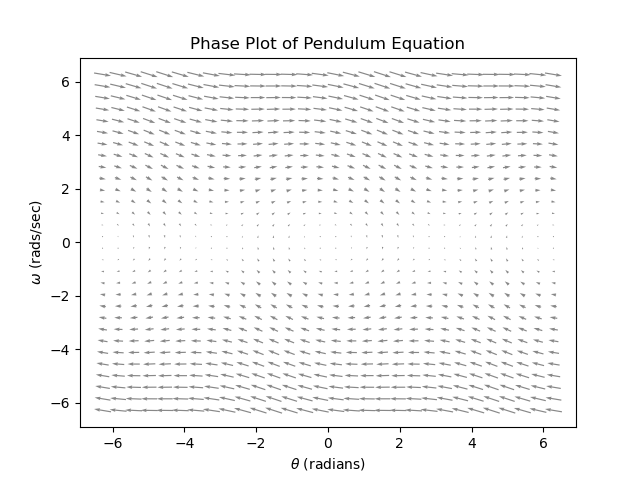

In [51]:
# Begin plot
plt.figure()

# Phase plot
thv, omv = np.meshgrid(
    np.linspace(-2*np.pi, 2*np.pi, 30),
    np.linspace(-2*np.pi, 2*np.pi, 30))
thd = omv
omd = -(g/L)*np.sin(thv) - (b/m)*omv
plt.quiver(thv, omv, thd, omd, color='#888', pivot='mid')

# Show plot
plt.xlabel('$\\theta$ (radians)')
plt.ylabel('$\omega$ (rads/sec)')
plt.title('Phase Plot of Pendulum Equation')
plt.show()

Simulate using ode

<IPython.core.display.Javascript object>


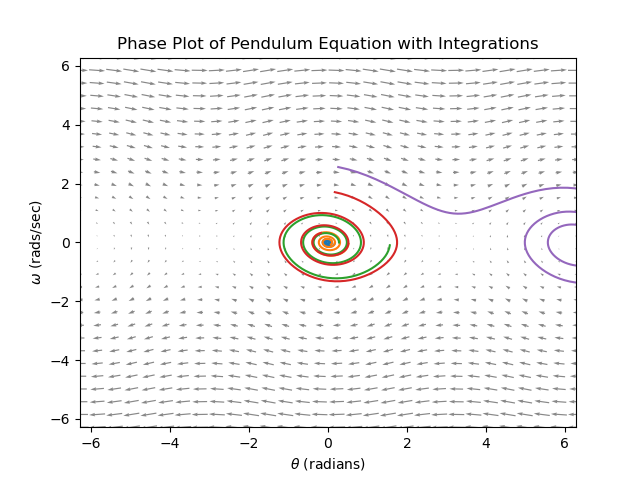

In [52]:
# Integration function
f = lambda t, Th: [Th[1], -(g/L)*np.sin(Th[0]) - (b/m)*Th[1]]

# Plot all of this garbage
plt.figure()

# Quiver plot
thv, omv = np.meshgrid(
    np.linspace(-2*np.pi, 2*np.pi, 30), 
    np.linspace(-2*np.pi, 2*np.pi, 30))
thd = omv
omd = -(g/L)*np.sin(thv)
plt.quiver(thv, omv, thd, omd, color='#888', pivot='mid')

# Create Integration Plots
for th0, om0 in Th0s:
    r = ode(f).set_initial_value([th0, om0], t0)
    Th = []
    while r.successful() and r.t < tf:
        Th_i = r.integrate(r.t + dt)
        Th.append(Th_i)
    Th = np.array(Th)
    th = Th[:,0]
    om = Th[:,1]
    plt.plot(th, om)
    
# Display plot
plt.xlabel('$\\theta$ (radians)')
plt.ylabel('$\omega$ (rads/sec)')
plt.title('Phase Plot of Pendulum Equation with Integrations')
plt.axis([-2*np.pi, 2*np.pi, -2*np.pi, 2*np.pi])
plt.show()